In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sys import path
from os import getcwd
from glob import glob
from urllib import request
from tqdm import tqdm
from time import sleep
from random import randint
from PIL import Image

In [ ]:
PROJECT_PATH = getcwd()[:getcwd().find("notebooks")][:-1]
path.append(f"{PROJECT_PATH}\\src")

In [ ]:
from utils import (load_pickle, 
                   dump_pickle, 
                   create_dir)

In [ ]:
PICKLE_PATH = f"{PROJECT_PATH}\\pickles"
IMAGE_PATH = f"{PROJECT_PATH}\\images"
PRODUCT_TYPE = "Sun-Ceramic-Container"
BASE_IMAGE_NAME = f"{PRODUCT_TYPE}" 

In [6]:
create_dir(IMAGE_PATH)

Failed creating directory, exception : [WinError 183] Cannot create a file when that file already exists: 'E:\\Projects\\amazon_reviews\\images'


In [7]:
review_pickles = glob(pathname = f"{PICKLE_PATH}\\*.pickle")
review_pickles = [filename for filename in review_pickles if PRODUCT_TYPE in filename]
print(f"Found {len(review_pickles)} review pickles for {PRODUCT_TYPE}")

Found 499 review pickles for Sun-Ceramic-Container


In [8]:
def fix_img_url(url):
    return url.replace("._SY88","")

In [9]:
def is_image_in_review(review):
    if len(review["images"]) > 0:
        return True
    return False

In [10]:
def download_and_save_image(url, filename):
    request.urlretrieve(url=url, filename=filename)

In [11]:
reviews_with_image = []
for review_pickle in tqdm(review_pickles):
    reviews = load_pickle(review_pickle)
    reviews = list(reviews.values())[0]
    for review in reviews:
        if is_image_in_review(review):
            review["images"] = [fix_img_url(img_url) for img_url in review["images"]]
            reviews_with_image.append(review)

100%|███████████████████████████████████████████████████████████████████████████████| 499/499 [00:04<00:00, 120.09it/s]


In [12]:
failed_img_download_url = []

In [13]:
for review in tqdm(reviews_with_image):
    filename = f"{IMAGE_PATH}\\{BASE_IMAGE_NAME}-{review['reviewer_id']}" 
    for i, img_url in enumerate(review["images"]):
        try:
            download_and_save_image(url=img_url, filename=f"{filename}-{i}.jpg")
        except Exception as e:
            failed_img_download_url.append([review["reviewer_id"], i, img_url])
            print(f"failed download, Exception : {e}")
        sleep(randint(4,7))

100%|████████████████████████████████████████████████████████████████████████████████| 166/166 [25:10<00:00,  9.10s/it]


In [76]:
image = Image.open(r"E:\Projects\amazon_reviews\images\Bedding-Linenspa-AFN3R273ECI6VTPIMQJW7L7BNRMQ-1.jpg")

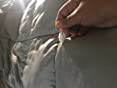

In [77]:
image

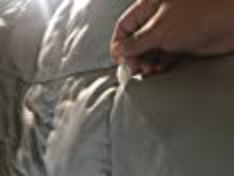

In [88]:
image.resize(tuple(2*i for i in image.size), resample=Image.BILINEAR)